In [1]:
import numpy as np
from pathlib import Path
path = Path("../daily-historical-stock-prices-1970-2018/historical_stock_prices_light.csv")

In [2]:
from inference.prepare import StockData

stockData = StockData()

In [3]:
array, tickers, dates = stockData.get_N_stocks(10)
print("Shape of the output array is: {}".format(array.shape))
print("Number of stocks observed is: {}".format(len(tickers)))
print("Number of observations is: {}".format(len(dates)))
print(array[:5])

Shape of the output array is: (12269, 10)
Number of stocks observed is: 10
Number of observations is: 12269
[[30.125       0.92592591  3.54166675  9.4375     18.22500038  9.15310669
   1.25        0.85677081  1.234375    1.9296875 ]
 [30.625       1.00823045  3.45833325  9.5625     18.29999924  9.58456612
   1.21875     0.85416669  1.2578125   1.9375    ]
 [31.          1.02469134  3.44791675  9.46875    18.41250038  9.76947689
   1.18923616  0.84375     1.25390625  1.96875   ]
 [30.75        1.02880657  3.33333325  9.4375     18.42499924  9.64620304
   1.21180558  0.8515625   1.25        1.96484375]
 [30.75        1.03292179  3.26041675  9.3125     18.4375      9.49211025
   1.20659721  0.85677081  1.234375    1.953125  ]]


In [4]:
from inference.sample import StockSampler

m=4

sampler = StockSampler(array, tickers, dates, m=m)

In [5]:
sampler.x

array([[ 30.125     ,   0.92592591,   3.54166675, ...,   0.85677081,
          1.234375  ,   1.9296875 ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 71.27999878, 348.76998901, 137.82000732, ...,  45.65000153,
        132.61000061,  79.51999664]])

In [6]:
sampler.sample(100)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:47<00:00,  1.08s/it]


In [7]:
from inference.analyse import StockAnalysis

params = {"theta": sampler.theta, "b2":sampler.b2}

analyser = StockAnalysis(sampler.prices_array, sampler.etas + sampler.Rs,
                        sampler.tickers, params, dates=sampler.dates, m=m)

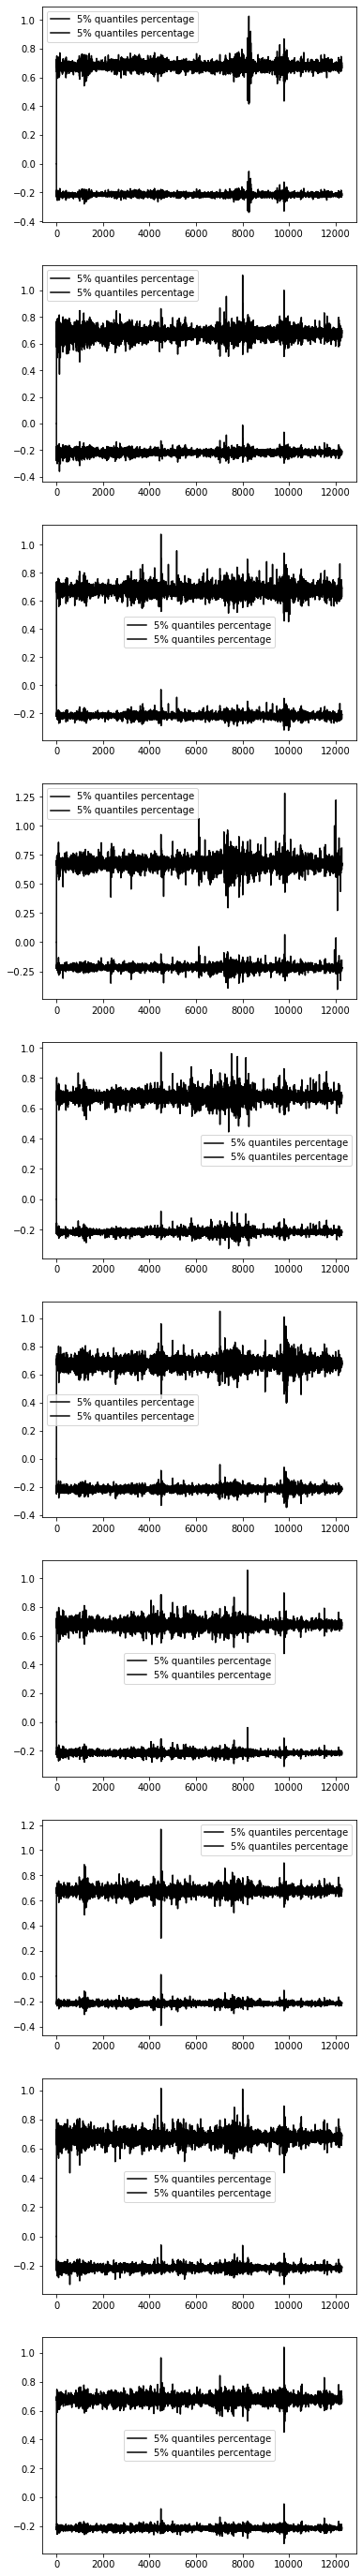

In [8]:
analyser.plot_quantiles_percentage()

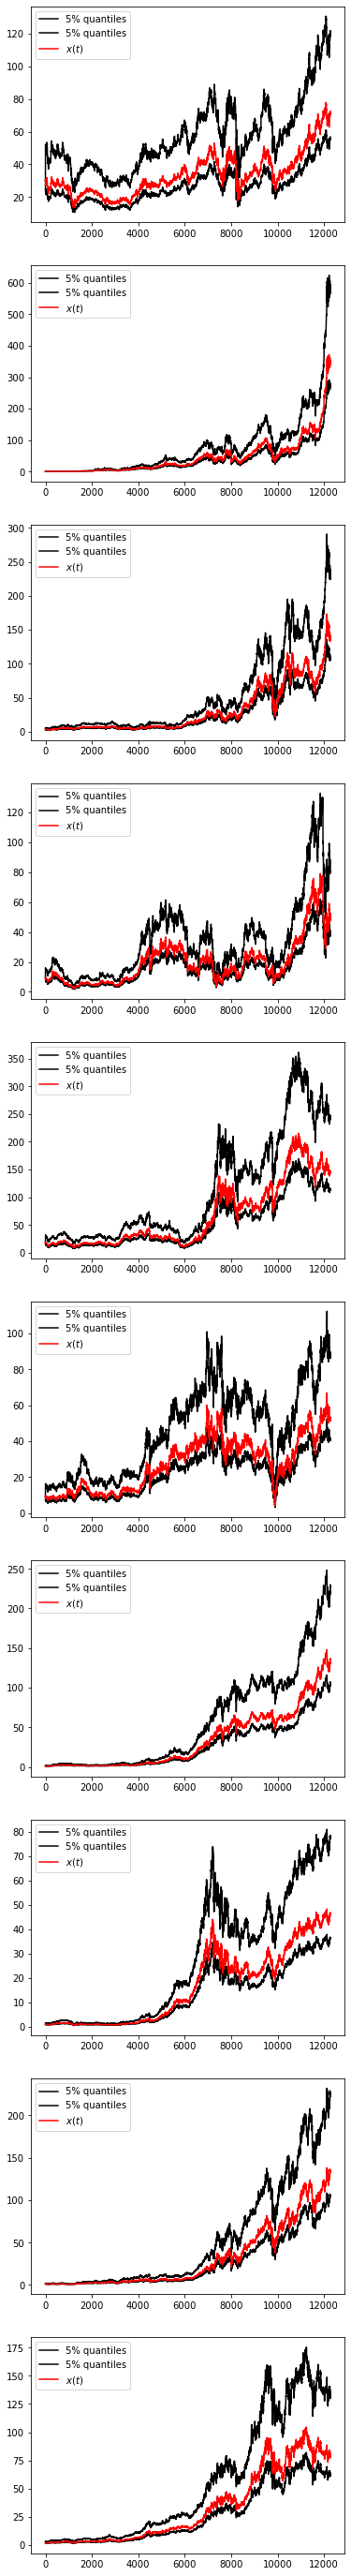

In [9]:
analyser.plot_quantiles()

In [10]:
index_list = [1,2,3,5,6,7,8,9]
observed_tickers = [sampler.tickers[i] for i in index_list]

No handles with labels found to put in legend.


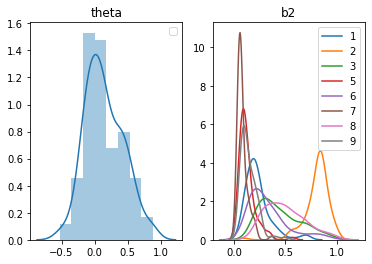

In [11]:
analyser.plot_parameter_distributions(observed_tickers)

In [12]:
sampler.tickers

['AEP', 'BA', 'CAT', 'FL', 'IBM', 'IP', 'JNJ', 'KO', 'UTX', 'XOM']

In [13]:
sampler.b2

array([[0.38781465, 0.26995023, 0.09621094, 0.22104081, 0.34512088,
        0.33484081, 0.19892068, 0.1468583 , 0.2426313 , 0.18601077],
       [0.38781465, 0.18401056, 0.7825698 , 0.55966057, 0.34512088,
        0.18694343, 0.63780719, 0.07453947, 0.55086877, 0.16466655],
       [0.38781465, 0.20617398, 0.7825698 , 0.31795906, 0.34512088,
        0.08391311, 0.79653312, 0.05094501, 0.42494058, 0.27357206],
       [0.38781465, 0.11789627, 0.7825698 , 0.47244396, 0.34512088,
        0.20056392, 0.26340926, 0.09008534, 0.67348864, 0.14323034],
       [0.38781465, 0.21604757, 0.7825698 , 0.51806592, 0.34512088,
        0.13554848, 0.46414103, 0.04753212, 0.33692113, 0.19960225],
       [0.38781465, 0.1676173 , 0.88898661, 0.91281385, 0.34512088,
        0.08206152, 0.33473951, 0.15966779, 0.41410682, 0.07892488],
       [0.38781465, 0.1529483 , 0.88898661, 0.25485336, 0.34512088,
        0.05724819, 0.17830717, 0.0911771 , 0.301575  , 0.0905354 ],
       [0.38781465, 0.11901707, 0.9825966